<a href="https://colab.research.google.com/github/annisaeka123/Machine_Learning-Semester5/blob/main/JS04/TugasPraktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Tugas K-Means**

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'

In [26]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Pembelajaran Mesin/JS05/Mall_Customers.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)

In [36]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

3. Buatlah model K-Means dengan mempertimbangkan jumlah *k* yang terbaik.

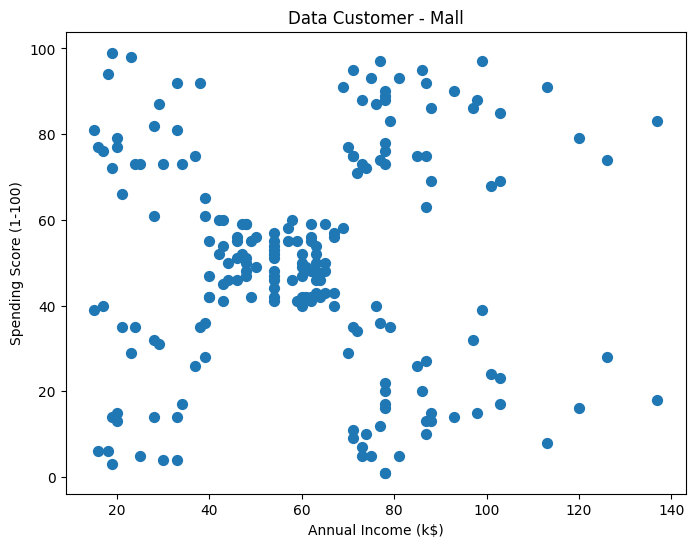

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.figure(figsize=(8,6))
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Data Customer - Mall")
plt.show()


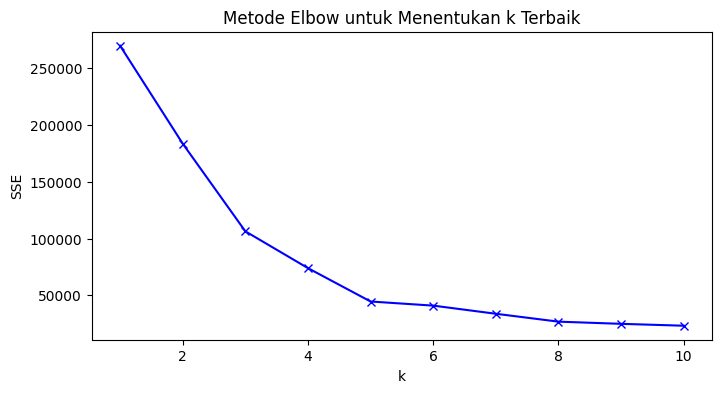

k=1; SSE=269981.28000000014
k=2; SSE=183653.3289473683
k=3; SSE=106348.37306211119
k=4; SSE=73880.64496247198
k=5; SSE=44448.45544793369
k=6; SSE=40825.16946386947
k=7; SSE=33642.57922077922
k=8; SSE=26686.837785187785
k=9; SSE=24766.471609793436
k=10; SSE=23103.122085983905


In [39]:
sse = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot metode Elbow
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Menentukan k Terbaik")
plt.show()

# Cek nilai SSE per k
for idx, sse_val in enumerate(sse, start=1):
    print(f"k={idx}; SSE={sse_val}")


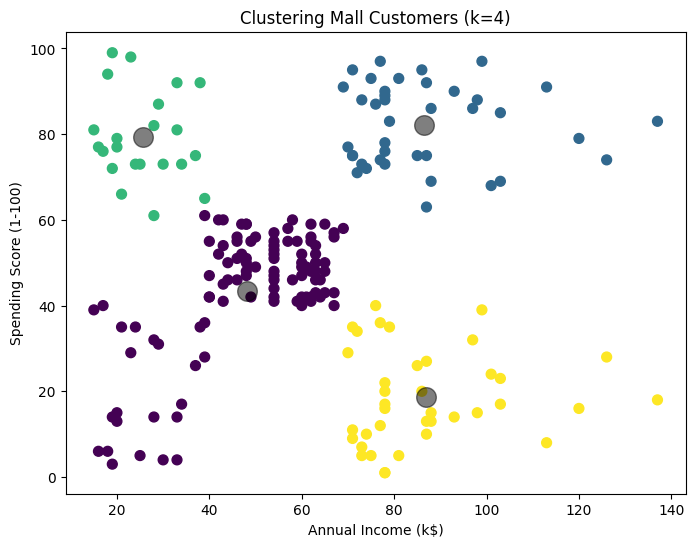

In [37]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot hasil cluster
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot centroid
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering Mall Customers (k=4)")
plt.show()

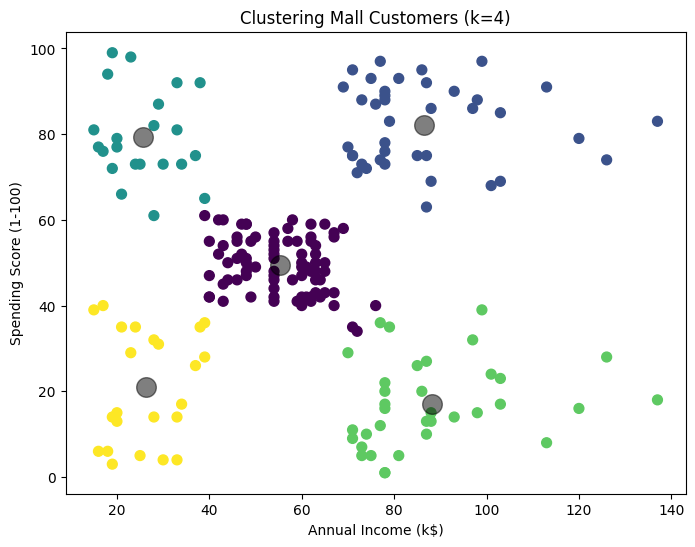

In [38]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot hasil cluster
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

# Plot centroid
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Clustering Mall Customers (k=4)")
plt.show()

**2. Tugas DBSCAN**

1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.

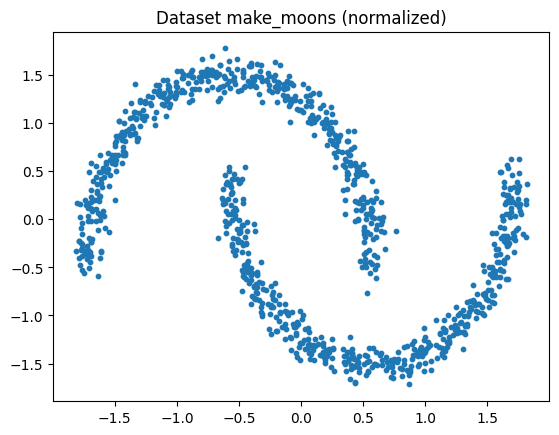

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

# Dataset make_moons
X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=0)

# Normalisasi
X = StandardScaler().fit_transform(X)

# Visualisasi data awal
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Dataset make_moons (normalized)")
plt.show()


2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.

In [41]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Hitung jumlah cluster & noise
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters:", n_clusters_)
print("Estimated number of noise points:", n_noise_)


Estimated number of clusters: 2
Estimated number of noise points: 0


3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.

In [42]:
from sklearn import metrics

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))


Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand Index: 1.000
Adjusted Mutual Information: 1.000
Silhouette Coefficient: 0.392


4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam)

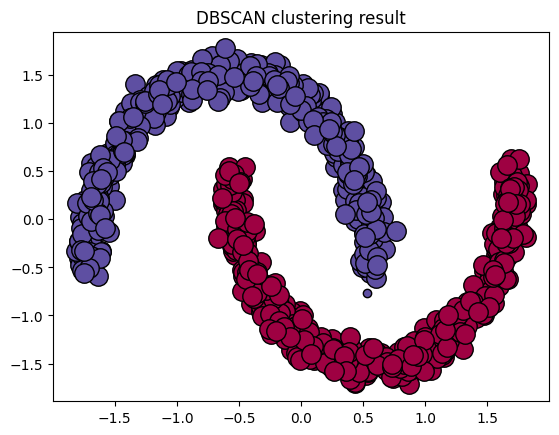

In [43]:
# Mask core samples
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Noise = hitam
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # Core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col),
             markeredgecolor="k", markersize=14)

    # Non-core samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=tuple(col),
             markeredgecolor="k", markersize=6)

plt.title("DBSCAN clustering result")
plt.show()


5. Lakukan eksperimen:

- eps = 0.05, 0.1, 0.3, 0.5

- min_samples = 3, 10, 20

- Catat perubahan klaster, noise, dan kualitas evaluasi.

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics

# Dataset make_moons
X, labels_true = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

# Eksperimen eps & min_samples
eps_values = [0.05, 0.1, 0.3, 0.5]
min_samples_values = [3, 10, 20]

results = []

for eps in eps_values:
    for min_s in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_s).fit(X)
        labels = db.labels_

        # Hitung jumlah cluster & noise
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        # Evaluasi
        hom = metrics.homogeneity_score(labels_true, labels)
        comp = metrics.completeness_score(labels_true, labels)
        v_meas = metrics.v_measure_score(labels_true, labels)
        ari = metrics.adjusted_rand_score(labels_true, labels)
        ami = metrics.adjusted_mutual_info_score(labels_true, labels)

        # Silhouette hanya dihitung jika cluster > 1
        sil = metrics.silhouette_score(X, labels) if n_clusters_ > 1 else None

        # Simpan hasil
        results.append([eps, min_s, n_clusters_, n_noise_, hom, comp, v_meas, ari, ami, sil])

# Tabel hasil
df_results = pd.DataFrame(results, columns=[
    "eps", "min_samples", "clusters", "noise",
    "Homogeneity", "Completeness", "V-measure", "ARI", "AMI", "Silhouette"
])

print(df_results)


     eps  min_samples  clusters  noise  Homogeneity  Completeness  V-measure  \
0   0.05            3        69    186     0.815554      0.152548   0.257021   
1   0.05           10         3    970     0.030669      0.126764   0.049389   
2   0.05           20         0   1000     0.000000      1.000000   0.000000   
3   0.10            3         2     14     0.986207      0.902896   0.942714   
4   0.10           10         7     57     0.943317      0.409546   0.571132   
5   0.10           20         6    850     0.153928      0.155466   0.154693   
6   0.30            3         2      0     1.000000      1.000000   1.000000   
7   0.30           10         2      0     1.000000      1.000000   1.000000   
8   0.30           20         2      0     1.000000      1.000000   1.000000   
9   0.50            3         2      0     1.000000      1.000000   1.000000   
10  0.50           10         2      0     1.000000      1.000000   1.000000   
11  0.50           20         2      0  

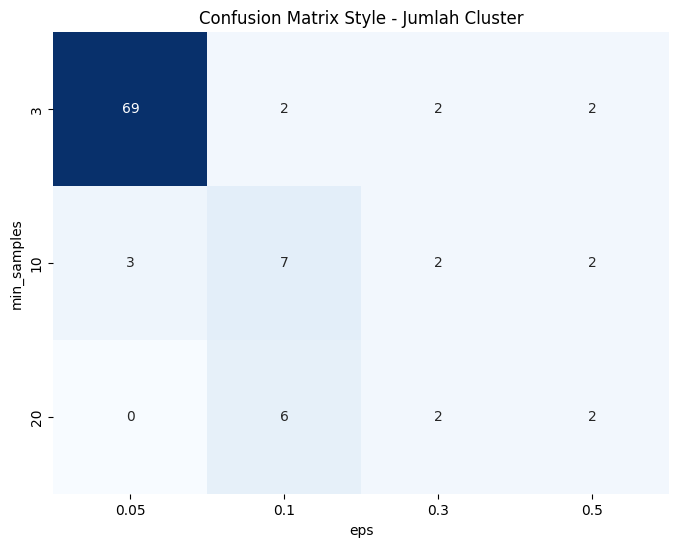

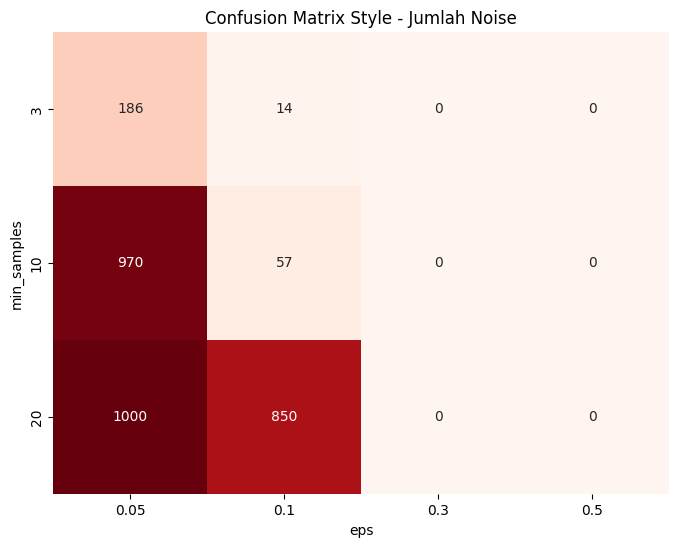

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Matriks jumlah cluster
mat_clusters = df_results.pivot(index="min_samples", columns="eps", values="clusters")

plt.figure(figsize=(8,6))
sns.heatmap(mat_clusters, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mat_clusters.columns,
            yticklabels=mat_clusters.index,
            cmap="Blues")
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.title("Confusion Matrix Style - Jumlah Cluster")
plt.show()

# Matriks jumlah noise
mat_noise = df_results.pivot(index="min_samples", columns="eps", values="noise")

plt.figure(figsize=(8,6))
sns.heatmap(mat_noise, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=mat_noise.columns,
            yticklabels=mat_noise.index,
            cmap="Reds")
plt.xlabel("eps")
plt.ylabel("min_samples")
plt.title("Confusion Matrix Style - Jumlah Noise")
plt.show()
